# Solving Tasks

In [13]:
import numpy as np
import os
import json
TRAINING_DATA_FOLDER_NAME = 'arcdata/evaluation';
fileNames = os.listdir(TRAINING_DATA_FOLDER_NAME);
fileNames = list(filter(lambda x: 'label' not in x, fileNames))
def get_task(index):
    """
    The idea of this function is that a newly created library function can be tested directly on the evaluation data 
    (how many problems could be solved right away with this functionality).
    """
    with open(f'{TRAINING_DATA_FOLDER_NAME}/{fileNames[index]}', 'r') as file:
        data = json.loads(file.read())
        train = []
        test = []
        for i in data['train']:
            train.append([np.asarray(i['input']), np.asarray(i['output'])])
        for i in data['test']:
            test.append([np.asarray(i['input']), np.asarray(i['output'])])
    return train, test

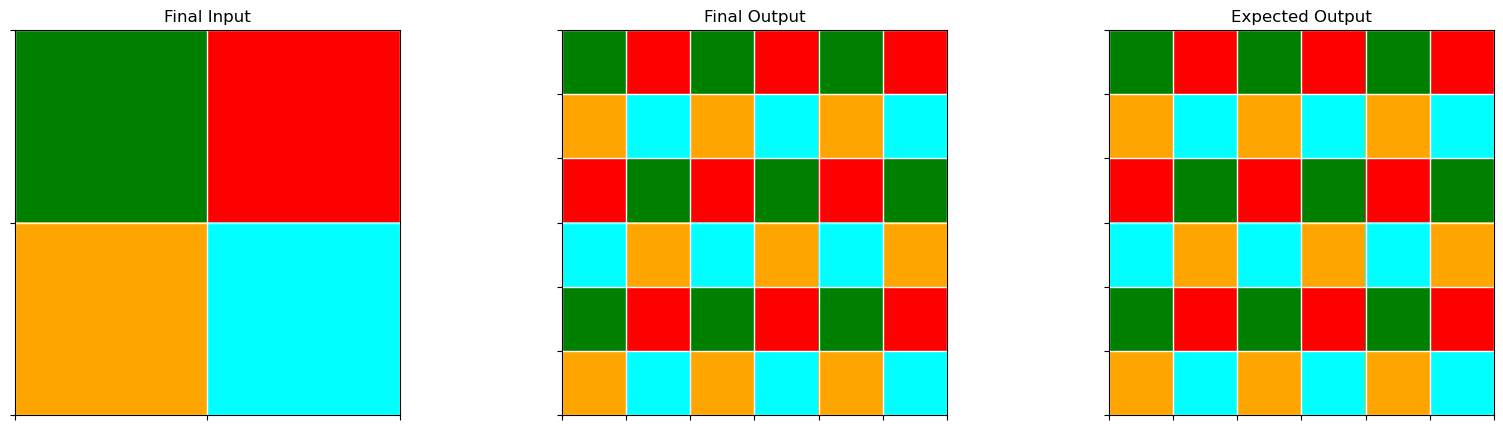

In [21]:
import transformation_functions as trfu
import helper as hlp
train, test = get_task(0)
r1 = np.tile(test[0][0], (1,3))
r2 = trfu.flip_vertically(r1)
r3 = np.append(r1, r2, axis=0)
r4 = np.append(r3,r1, axis=0)
hlp.displayIO([[test[0][0], 'Final Input'],[r4, 'Final Output'], [test[0][1], 'Expected Output']])

In [18]:
import helper as hlp
import preprocessing as pp
import numexpr as ne
train, test = get_task(1)
inp = pp.preprocess(train)[0][0]
outp = pp.preprocess(train)[0][1]
'''
hlp.displayIO([[train[0][0], 'Input'],[train[0][1], 'Output']])
hlp.displayIO([[train[1][0], 'Input'],[train[1][1], 'Output']])
hlp.displayIO([[train[2][0], 'Input'],[train[2][1], 'Output']])
hlp.displayIO([[train[3][0], 'Input'],[train[3][1], 'Output']])
hlp.displayIO([[train[4][0], 'Input'],[train[4][1], 'Output']])
hlp.displayIO([[test[0][0], 'Final Input'],[test[0][1], 'Expected Output']])
print(json.dumps(pp.preprocess(train)[0][0], indent=4, cls=hlp.HitchHikersEncoder))
'''

sameShape = inp.shape == outp.shape
sameSum = inp.sum == outp.sum
sameSize = inp.size == outp.size
sameColor = np.array_equal(inp.colors, outp.colors)
#sameObjectCount = np.asarray(inp.objects).size == np.asarray(outp.objects).size
sameSum, inp.sum, outp.sum
np.asarray(inp.objects).size, np.asarray(outp.objects).size
sameObjects=[]
for i in inp.objects:
    for j in outp.objects:
        if np.array_equal(i.getRawWithoutColor(), j.getRawWithoutColor()):
            sameObjects.append(i.getRawWithoutColor())           
sameObjects, len(sameObjects)
diff = abs(inp.raw - outp.raw)
sameShape, sameSum, sameSize, sameColor, sameObjects, len(sameObjects)

(True,
 False,
 False,
 False,
 [array([[0., 0., 0., 1., 1., 0., 1., 1., 0.],
         [0., 0., 0., 0., 1., 1., 1., 0., 0.],
         [0., 1., 1., 1., 1., 0., 0., 0., 0.],
         [1., 1., 0., 1., 0., 0., 1., 1., 0.],
         [0., 0., 0., 1., 1., 1., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0., 1., 0., 0.],
         [0., 0., 1., 1., 1., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 0., 0., 0., 1.]])],
 1)

In [49]:
class Correlation:
    def __init__(self, i, o):
        self.sameShape = i.shape == o.shape
        self.sameSum = i.sum == o.sum
        self.sameSize = i.size == o.size
        self.sameColor = np.array_equal(i.colors, o.colors)
        self.sameObjects=[]
        for i_objects in i.objects:
            for o_objects in o.objects:
                if np.array_equal(i_objects.getRawWithoutColor(), o_objects.getRawWithoutColor()):
                    self.sameObjects.append(i_objects.getRawWithoutColor()) 
wessen = Correlation(inp, outp)
wessen.sameObjects

[array([[0., 0., 0., 1., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 1., 0., 1., 1., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1.]])]

In [46]:
import math
question = math.nan

In [60]:
import preprocessing as pp
import numpy as np
matrix_two = [[1, 2, 1], 
              [2, 2, 2], 
              [3, 2, 3]]
matrix_one = [[1, 1, 1], 
              [1, 2, 1], 
              [3, 1, 3]]
m1 = pp.Grid(np.array(matrix_one))
m2 = pp.Grid(np.array(matrix_two))
arr = []
for attribute, value in vars(m2).items():
    #print(getattr(m1, attribute))
    if type(value) == int or type(value) == np.int32:
        print(attribute, value == getattr(m1, attribute))
        print('int')
    elif type(value) == tuple:
        print('tuple')
    elif type(value) == np.ndarray or type(value) == list:
        print(np.count_nonzero(value == getattr(m1, attribute)) / np.asarray(value).size)
        print(attribute, value == getattr(m1, attribute))
        print('array')
    else:
        print('default')
    #print(type(value) == int or type(value) == np.int32)
    #print(attribute, value, type(value))

0.5555555555555556
raw [[ True False  True]
 [False  True False]
 [ True False  True]]
array
tuple
sum False
int
size True
int
0.0
pixels False
array
1.0
colors [ True  True  True]
array
0.0
objects False
array


In [20]:
print('test')

test


AttributeError: type object 'Grid' has no attribute 'shape'